# Data Exploration

In [1]:
RGR.Raw <- data.frame(read.csv("C:/Users/jodyn/OneDrive/Github/Trait-Performance-Relationships/data/RGR.csv"))
MSH.Raw <- data.frame(read.csv("C:/Users/jodyn/OneDrive/Github/Trait-Performance-Relationships/data/MSH all data_July2015.csv"))

In [2]:
# what do these  data look like?
head(RGR.Raw)

SampleID,BA.0.2006,BA.0.2007,BA.0.2008,BA.0.2009,BA.0.2010,BA.0.2011
J10ACSA19,12.018423,NA,NA,NA,NA,12.437202
J10AMSP12,11.916452,12.604177,13.434528,14.603302,15.698010,16.527046
J10AMSP13,4.978399,5.334679,5.961424,6.940494,8.224628,9.186387
J10FAG15,6.611162,7.442033,8.581504,9.681168,10.510053,11.293637
J10FRA19,10.509488,10.799639,11.158824,11.554593,12.002439,12.548089
J10OSV19,1.857446,2.135612,2.383083,2.551090,2.824035,3.094184


In [3]:
nrow(RGR.Raw)

[1] 395

In [4]:
head(MSH.Raw)

Sample.ID,Height.DBH.Ratio,Estem,Etwig,Branching.Distance,Twig.Diameter,Twig.Wood.Density,Stem.Wood.Density,Leaf.Mass.Fraction,Leaf.Area,...,Leaf.Thickness,Leaf.Density,C.N,C.P,N.P,Kl,Kleaf,Biomass1,pcent.max.Bio1,Total.Transmitted.Light
J10ACSA19,120.00000,2807.719,368.4968,16.750000,5.440,0.6568855,0.7900303,0.8552028,43.42781,...,0.0938,0.3864892,25.47644,5.815661,0.2282760,453.3973,0.2043562,0.06979659,0.00645662,2.425
J10AMSP12,98.29268,2012.670,539.4002,8.000000,4.395,0.6276060,0.8900391,1.0007017,13.62967,...,0.1218,0.3794966,18.72918,4.112673,0.2195864,306.8134,0.7228903,0.82903646,0.22745817,3.890
J10AMSP13,160.66667,7055.698,378.0921,11.368421,5.400,0.6641150,0.8772109,0.6397234,18.23260,...,0.1334,0.3663307,21.29783,4.364887,0.2049452,259.7530,0.4825453,0.96175893,0.27922246,4.590
J10FAG15,141.42857,3871.404,722.9500,9.777778,3.725,0.6042533,0.7510540,1.5427180,51.98562,...,0.0854,0.4024881,21.06370,4.721752,0.2241654,349.5795,0.6831540,0.78358389,0.19022354,2.980
J10FRA19,113.94737,3121.343,113.9802,56.000000,8.935,0.5481215,0.7678219,1.1889349,354.28250,...,0.0924,0.4778804,18.15457,3.843781,0.2117253,2310.4256,0.4141856,0.54564968,0.18820291,6.500
J10OSV19,193.33333,4496.479,684.6123,8.285714,3.760,0.5830135,0.7995936,1.5381013,19.58762,...,0.1070,0.3369430,22.02248,5.631711,0.2557255,578.3284,1.6445056,0.27014928,0.18079595,2.820


In [5]:
nrow(MSH.Raw)

[1] 395

In [6]:
length(names(which(apply(MSH.Raw, 2, anyNA))))

[1] 30

In [7]:
# not sure how many columns there are in the first place. is that alot?
ncol(MSH.Raw)

[1] 70

In [8]:
length(names(which(apply(RGR.Raw, 2, anyNA))))

[1] 6

In [9]:
ncol(RGR.Raw)

[1] 7

So, 30/70 columns in the trait data have NAs. That's ~43%. I may have to do some imputation to fill in those NAs. For the growth rate dataset, 6/7 columns have NAs. That's about 85%. 

There are numerous packages I can use for this step, but a paper I read (Handling missing values: A study of popular imputation packages in R) recommends VIM. The authors argue that VIM seems to have higher accuracy and does better with smaller datasets (n<15000). I can use 1 of four methods in VIM (https://core.ac.uk/download/pdf/156957839.pdf). I will do some reading on which of the four I should use over the weekend.

After doing reading, I will use the robust  EMbased imputation method, which is the only method in the package that does multiple imputations. For this method, we use both the variance and OLS to fill in the missing values. But, here, we are using the observed data to estimate multiple values at a time. These values should reflect the uncertainty around the true value.

I will compare performance between just running the model without the missing cases vs the imputated dataset. If the results converge, I will use the imputated dataset.

In [10]:
library(VIM)
library(FactoMineR)
library(missMDA)
library(naniar)
library(mice)
library(mvnormtest)
library(RVAideMemoire)

Warning message:
"package 'VIM' was built under R version 3.6.3"Loading required package: colorspace
Loading required package: grid
VIM is ready to use.

Suggestions and bug-reports can be submitted at: https://github.com/statistikat/VIM/issues

Attaching package: 'VIM'

The following object is masked from 'package:datasets':

    sleep

Warning message:
"package 'FactoMineR' was built under R version 3.6.3"Warning message:
"package 'missMDA' was built under R version 3.6.3"Warning message:
"package 'naniar' was built under R version 3.6.3"Warning message:
"package 'mice' was built under R version 3.6.3"
Attaching package: 'mice'

The following objects are masked from 'package:base':

    cbind, rbind

Warning message:
"package 'mvnormtest' was built under R version 3.6.3"Warning message:
"package 'RVAideMemoire' was built under R version 3.6.3"*** Package RVAideMemoire v 0.9-77 ***

Attaching package: 'RVAideMemoire'

The following object is masked from 'package:mvnormtest':

    msha

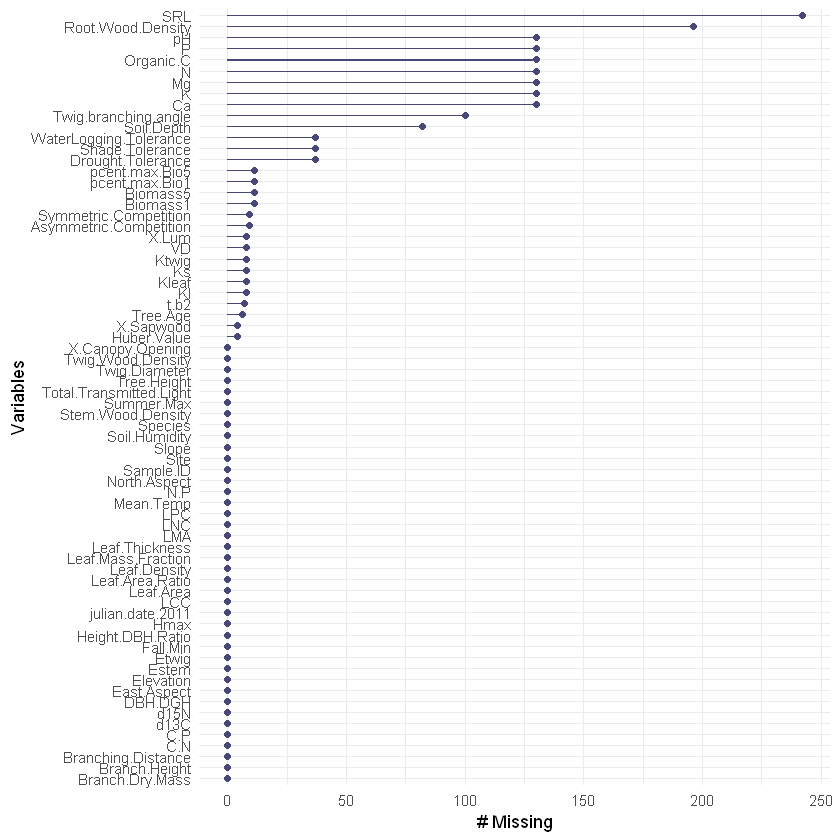

In [11]:
# where are most of the missing trait data?
gg_miss_var(MSH.Raw)

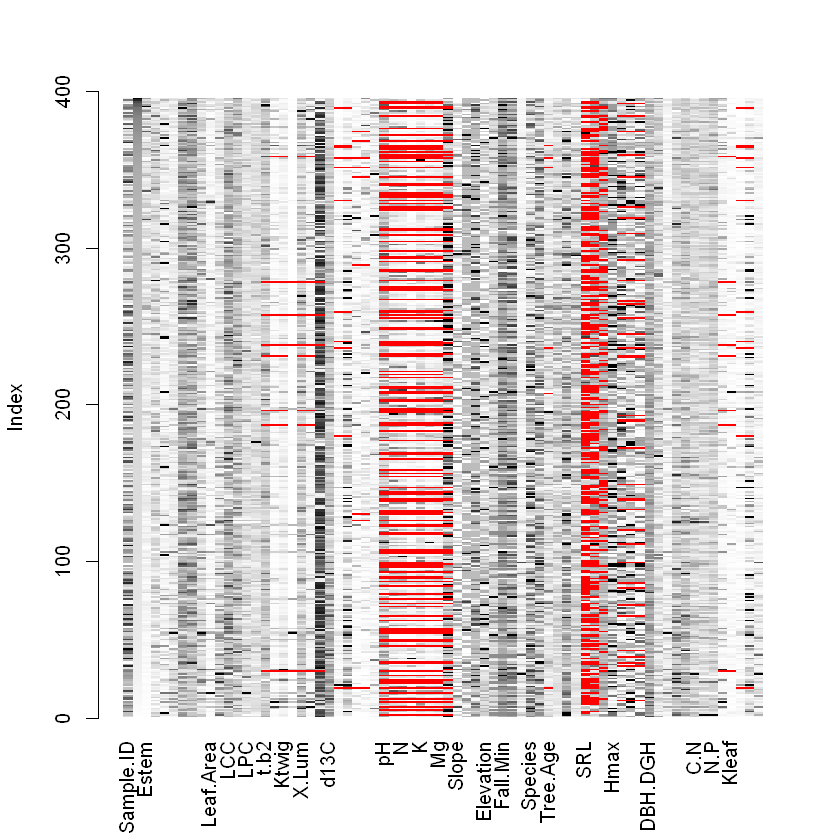

In [12]:
# is there a trend in where data is missing?
matrixplot(MSH.Raw, sortby = 2)

Might be best to just drop some the columns trait values with a large % of missing data. 

I will compare K nearest neighbour and median as the method for initialization of missing values and compare the results. The maximum number of iterations, by default, is 100 and the threshold for convergence is 5 (https://www.rdocumentation.org/packages/VIM/versions/4.5.0/topics/irmi)

For the trait data, I will simply remove those with a majority of missing cases before running the imputation - I am thinking of using a cut of less than 50%. I will use which to figure which columns fit this condition. I will use both mice and vim. If the data are non-normal, some reccommend predictive mean matching. I will use multivariate test for normality + examine a qqplot to see if the data are normal. If they are not, I will use predictive mean matching from mice. From vim, I will use robust EMbased imputation method. 

In [13]:
# removing cases with a bunch of zeroes
MSH.NA150 <- MSH.Raw[,names(which(apply(MSH.Raw, 2, function (x) sum(is.na(x))<150)))]

In [14]:
# I only want columns that are numeric
numeric_columns <- which(apply(MSH.NA150,2, function (x) !is.na(mean(as.numeric(x), na.rm = TRUE))))

Warning message in mean(as.numeric(x), na.rm = TRUE):
"NAs introduced by coercion"Warning message in mean(as.numeric(x), na.rm = TRUE):
"NAs introduced by coercion"Warning message in mean(as.numeric(x), na.rm = TRUE):
"NAs introduced by coercion"

I decided to try mice (pacakge), which has a range of regression-based methods (including) descion trees. To use any of the regression-based options, I need some degree of normality. Allternaivelu, I can use predictive  mean matching, which works well for non-normal data. First, I will check for multivariate normality.

I decided to try mice (package), which has a range of regression-based methods (including) decision trees. To use any of the regression-based options, I need some degree of normality. Alternatively, I can use predictive mean matching, which works well for non-normal data. First, I will check for multivariate normality.

[1]  83 108

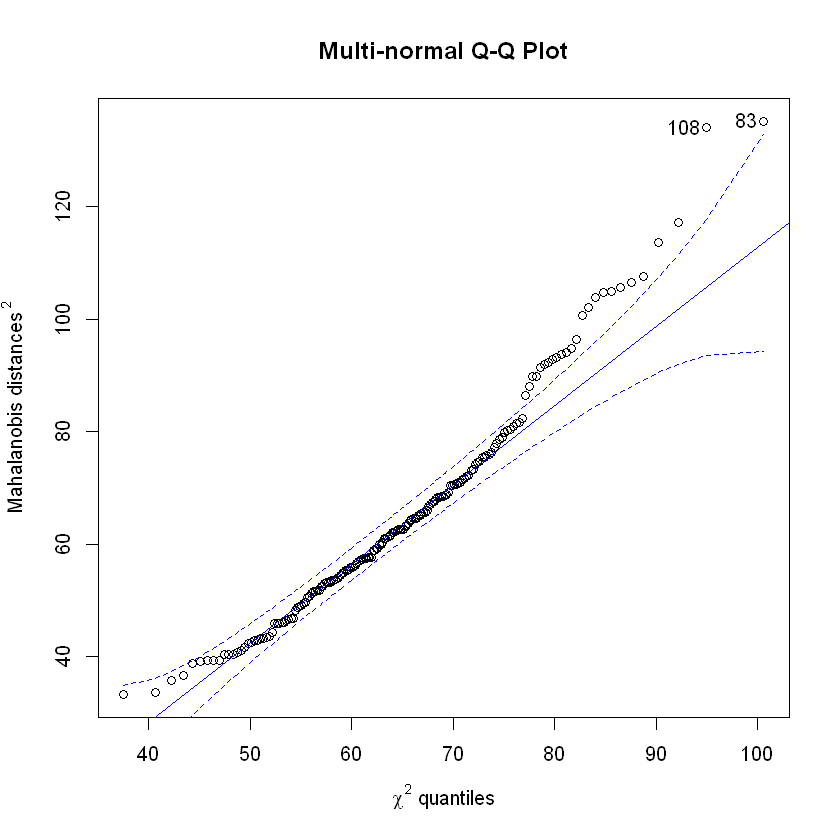

In [15]:
# need to make sure the data are being read as numeric for this to work
mqqnorm(na.omit(data.matrix(MSH.NA150[,numeric_columns])))

In [16]:
mshapiro.test(na.omit(data.matrix(MSH.NA150[,numeric_columns])))


	Multivariate Shapiro-Wilk normality test

data:  (Height.DBH.Ratio,Estem,Etwig,Branching.Distance,Twig.Diameter,Twig.Wood.Density,Stem.Wood.Density,Leaf.Mass.Fraction,Leaf.Area,LMA,LCC,LNC,LPC,d15N,t.b2,Ks,Ktwig,Huber.Value,X.Lum,VD,X.Sapwood,d13C,Biomass5,pcent.max.Bio5,Symmetric.Competition,Asymmetric.Competition,Soil.Humidity,pH,Organic.C,N,P,K,Ca,Mg,Soil.Depth,Slope,North.Aspect,East.Aspect,Elevation,Summer.Max,Fall.Min,Mean.Temp,X.Canopy.Opening,Tree.Age,Tree.Height,julian.date.2011,Branch.Height,Twig.branching.angle,Hmax,Shade.Tolerance,Drought.Tolerance,WaterLogging.Tolerance,DBH.DGH,Leaf.Area.Ratio,Branch.Dry.Mass,Leaf.Thickness,Leaf.Density,C.N,C.P,N.P,Kl,Kleaf,Biomass1,pcent.max.Bio1,Total.Transmitted.Light)
W = 0.43049, p-value < 2.2e-16


The data seem to be non-normal, overall. While some are probably close to normal, it might be safer to just use mean matching.

In [17]:
MSH.IP <- mice(data.matrix(MSH.NA150[,numeric_columns]), 
               printFlag=FALSE, method = "pmm", m = 5, seed = 300)

Warning message:
"Number of logged events: 675"

In [18]:
MSH.IP.IRMI <- irmi(data.matrix(MSH.NA150[,numeric_columns]))

In [19]:
head(MSH.IP.IRMI)

Height.DBH.Ratio,Estem,Etwig,Branching.Distance,Twig.Diameter,Twig.Wood.Density,Stem.Wood.Density,Leaf.Mass.Fraction,Leaf.Area,LMA,...,Soil.Depth_imp,Tree.Age_imp,Twig.branching.angle_imp,Shade.Tolerance_imp,Drought.Tolerance_imp,WaterLogging.Tolerance_imp,Kl_imp,Kleaf_imp,Biomass1_imp,pcent.max.Bio1_imp
120.00000,2807.719,368.4968,16.750000,5.440,0.6568855,0.7900303,0.8552028,43.42781,36.25269,...,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
98.29268,2012.670,539.4002,8.000000,4.395,0.6276060,0.8900391,1.0007017,13.62967,46.22268,...,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE
160.66667,7055.698,378.0921,11.368421,5.400,0.6641150,0.8772109,0.6397234,18.23260,48.86851,...,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE
141.42857,3871.404,722.9500,9.777778,3.725,0.6042533,0.7510540,1.5427180,51.98562,34.37248,...,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
113.94737,3121.343,113.9802,56.000000,8.935,0.5481215,0.7678219,1.1889349,354.28250,44.15615,...,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
193.33333,4496.479,684.6123,8.285714,3.760,0.5830135,0.7995936,1.5381013,19.58762,36.05290,...,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


Now, I will run the imputation on these data. Since I have removed the columns with a large amount of missing cases, the imputation should work. If not, I will set a more stringent condition. 

In [20]:
# fit a lm and see if results are comparable between mice output and raw data
fit.base = lm(Tree.Height ~ Soil.Depth + Biomass1, data = MSH.NA150)
summary(fit.base)


Call:
lm(formula = Tree.Height ~ Soil.Depth + Biomass1, data = MSH.NA150)

Residuals:
    Min      1Q  Median      3Q     Max 
-287.09 -102.28  -17.95   90.83  525.30 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 388.7061    18.6338  20.860  < 2e-16 ***
Soil.Depth    0.4576     0.5080   0.901    0.368    
Biomass1     21.5830     4.4587   4.841 2.07e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 130.9 on 302 degrees of freedom
  (90 observations deleted due to missingness)
Multiple R-squared:  0.07798,	Adjusted R-squared:  0.07188 
F-statistic: 12.77 on 2 and 302 DF,  p-value: 4.736e-06


In [21]:
# build a model using dataset from mice, for all 5 of them
fit.mice <- with(data = MSH.IP, exp = lm(Tree.Height ~ Soil.Depth + Biomass1))

# pool results together 
combFit <- pool(fit.mice) 
# Note that the function pool() works for any object having BOTH coef() and vcov() methods, such as lm, glm and Arima, also for lme in nlme package.
summary(combFit)

term,estimate,std.error,statistic,df,p.value
(Intercept),387.8234274,16.5780245,23.393826,268.1611,0.000000000
Soil.Depth,0.6723785,0.4531367,1.483831,198.5267,0.139439530
Biomass1,10.4743309,3.4246909,3.058475,278.2229,0.002441425
